# 累积分布函数
- 累积分布函数CDF：cumulative distribution function
- 百分位秩percentile rank：『成绩位于第90百分位』说明成绩高于或等于90%的人
- 百分位数percentile：对给定的百分位秩，对应的值

CDF将一个值映射到百分位秩。

In [1]:
%matplotlib inline
from __future__ import print_function, division

import numpy as np
import pandas
import thinkstats2
import thinkplot
import nsfg

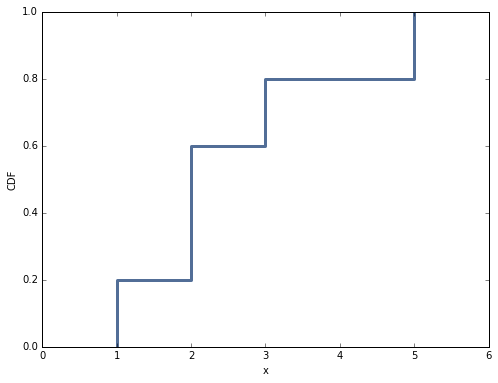

In [2]:
thinkstats2.RandomSeed(17)
"""Makes a simple example CDF."""
t = [2, 1, 3, 2, 5]
cdf = thinkstats2.Cdf(t)
thinkplot.Clf()
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='x',
                ylabel='CDF',
                axis=[0, 6, 0, 1],
                legend=False) 

In [4]:
def MakeFrames():
    """Reads pregnancy data and partitions first babies and others.

    returns: DataFrames (all live births, first babies, others)
    """
    preg = nsfg.ReadFemPreg()

    live = preg[preg.outcome == 1]
    firsts = live[live.birthord == 1]
    others = live[live.birthord != 1]

    assert len(live) == 9148
    assert len(firsts) == 4413
    assert len(others) == 4735

    return live, firsts, others
live, firsts, others = MakeFrames()

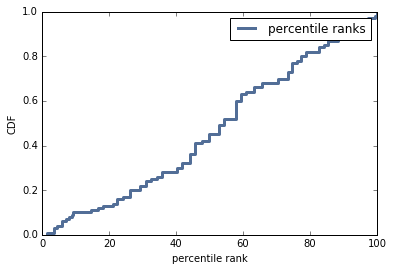

In [5]:
weights = live.totalwgt_lb
cdf = thinkstats2.Cdf(weights, label='totalwgt_lb')

sample = np.random.choice(weights, 100, replace=True)
ranks = [cdf.PercentileRank(x) for x in sample]

rank_cdf = thinkstats2.Cdf(ranks, label='percentile ranks')
thinkplot.Cdf(rank_cdf)
thinkplot.Config(xlabel='percentile rank', ylabel='CDF')

从成功生产的总体中选择一个随机样本，并查找样本中新生儿体重的百分位秩。如果我们计算出这个百分位秩的CDF（上图展示）：
- 样本中10%的值小于第10百分位数，20%的值小于第20百分位数，以此类推。
- 无论CDF的形状如何，其百分位秩的分布都是均匀的。
- 基于上述性质，可以设计一个随机数生成方法：
    - 从0到100中均匀地选择一个百分位秩；
    - 使用Cdf.Percentile，得到分布中对应所选百分位秩的值。

```py
# case：CDF
def Random(self):
    return self.Percentile(random.uniform(0, 100))
```

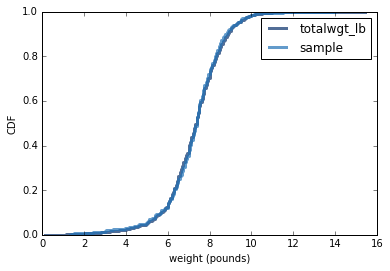

In [6]:
"""Plots the distribution of weights against a random sample.
live: DataFrame for live births
"""
weights = live.totalwgt_lb
cdf = thinkstats2.Cdf(weights, label='totalwgt_lb')

sample = cdf.Sample(1000)
sample_cdf = thinkstats2.Cdf(sample, label='sample')

thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf, sample_cdf])
thinkplot.Config(xlabel='weight (pounds)', ylabel='CDF')

妊娠期时间分布CDF：

- 大约10%妊娠期不超过35周，大约90%不超过41周。
- 分布中经常出现的值显示为陡峭或竖直的折线：39周为众数。小于30周的值很少，因此30周左侧的折线很平缓。

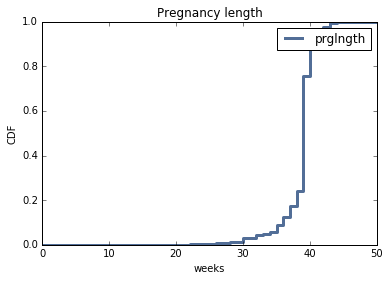

In [7]:
"""Plot the CDF of pregnancy lengths for live births.
live: DataFrame for live births
"""
cdf = thinkstats2.Cdf(live.prglngth, label='prglngth')
thinkplot.Cdf(cdf)
thinkplot.Config(title='Pregnancy length',
                xlabel='weeks',
                ylabel='CDF')

Firsts 4413 4363
Others 4735 4675


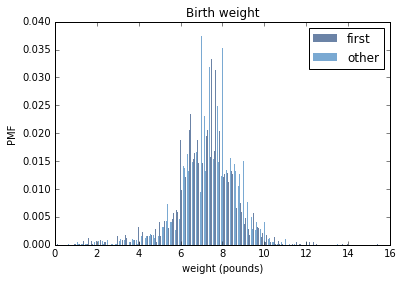

In [8]:
def MakeHistFigures(live, firsts, others):
    """Creates several figures for the book.

    live: DataFrame
    firsts: DataFrame
    others: DataFrame
    """

    first_wgt = firsts.totalwgt_lb
    first_wgt_dropna = first_wgt.dropna()
    print('Firsts', len(first_wgt), len(first_wgt_dropna))
    #assert len(first_wgt_dropna) == 4381

    other_wgt = others.totalwgt_lb
    other_wgt_dropna = other_wgt.dropna()
    print('Others', len(other_wgt), len(other_wgt_dropna))
    #assert len(other_wgt_dropna) == 4706

    first_pmf = thinkstats2.Pmf(first_wgt_dropna, label='first')
    other_pmf = thinkstats2.Pmf(other_wgt_dropna, label='other')

    width = 0.4 / 16

    # plot PMFs of birth weights for first babies and others
    thinkplot.PrePlot(2)
    thinkplot.Hist(first_pmf, align='right', width=width)
    thinkplot.Hist(other_pmf, align='left', width=width)
    thinkplot.Config(root='cumulative_birthwgt_pmf',
                   title='Birth weight',
                   xlabel='weight (pounds)',
                   ylabel='PMF')
MakeHistFigures(live, firsts, others)

新生儿体重的PMF局限：难以通过观察进行比较。

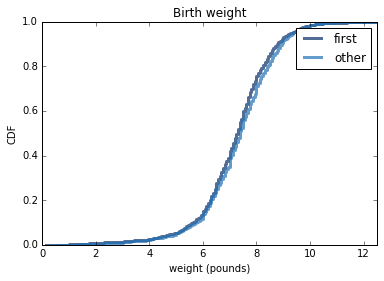

In [9]:
def MakeCdfFigures(live, firsts, others):
    # plot CDFs of birth weights for first babies and others
    first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
    other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')

    thinkplot.PrePlot(2)
    thinkplot.Cdfs([first_cdf, other_cdf])
    thinkplot.Config(root='cumulative_birthwgt_cdf',
                   title='Birth weight',
                   xlabel='weight (pounds)',
                   ylabel='CDF',
                   axis=[0, 12.5, 0, 1]
                   )
MakeCdfFigures(live, firsts, others)

与直方图比较，CDF更清晰地展示了分布之间的差异：第一胎新生儿普遍体重较轻，而且大于均值时差异更为明显。